# Word Embedding Mini Task


---
##  Cell 1 — Imports & Setup

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
import gensim.downloader as api
from IPython.display import display, HTML

def section(title, emoji='📌'):
    print(f'\n{"="*60}')
    print(f'  {emoji}  {title}')
    print(f'{"="*60}')

print('All imports successful!')
print(f'   numpy     : {np.__version__}')
import sklearn; print(f'   sklearn   : {sklearn.__version__}')
import matplotlib; print(f'   matplotlib: {matplotlib.__version__}')
import gensim; print(f'   gensim    : {gensim.__version__}')

All imports successful!
   numpy     : 2.4.2
   sklearn   : 1.8.0
   matplotlib: 3.10.8
   gensim    : 4.4.0



##  Cell 2 Load Pretrained Word2Vec (Google News 300-dim)



In [3]:
section('Loading Word2Vec — Google News 300-dim', '')
print('Downloading / loading from cache ...\n')

w2v_model = api.load('word2vec-google-news-300')

print(f'\n Word2Vec loaded!')
print(f'   Vocabulary size : {len(w2v_model.key_to_index):,}')
print(f'   Vector size     : {w2v_model.vector_size} dimensions')


    Loading Word2Vec — Google News 300-dim


 Word2Vec loaded!
   Vocabulary size : 3,000,000
   Vector size     : 300 dimensions



##  Cell 3 — Load Pretrained GloVe (Wikipedia + Gigaword, 100-dim)



In [4]:
section('Loading GloVe — Wikipedia + Gigaword 100-dim', '')
print('Downloading / loading from cache ...\n')

glove_model = api.load('glove-wiki-gigaword-100')

print(f'\n GloVe loaded!')
print(f'   Vocabulary size : {len(glove_model.key_to_index):,}')
print(f'   Vector size     : {glove_model.vector_size} dimensions')


    Loading GloVe — Wikipedia + Gigaword 100-dim


 GloVe loaded!
   Vocabulary size : 400,000
   Vector size     : 100 dimensions


---
##  Cell 4 — Find Similar Words (Word2Vec)





In [5]:
section('Similar Words — Word2Vec', '')

query_words = ['king', 'computer', 'music', 'france', 'doctor']

for word in query_words:
    if word in w2v_model.key_to_index:
        similars = w2v_model.most_similar(word, topn=5)
        top_words = [f'{w} ({round(s, 3)})' for w, s in similars]
        print(f'\n  [{word}]  →  ' + '  |  '.join(top_words))
    else:
        print(f'\n  [{word}] not in vocabulary')


    Similar Words — Word2Vec

  [king]  →  kings (0.714)  |  queen (0.651)  |  monarch (0.641)  |  crown_prince (0.62)  |  prince (0.616)

  [computer]  →  computers (0.798)  |  laptop (0.664)  |  laptop_computer (0.655)  |  Computer (0.647)  |  com_puter (0.608)

  [music]  →  classical_music (0.72)  |  jazz (0.683)  |  Music (0.66)  |  Without_Donny_Kirshner (0.642)  |  songs (0.64)

  [france]  →  spain (0.638)  |  french (0.633)  |  germany (0.631)  |  europe (0.626)  |  italy (0.626)

  [doctor]  →  physician (0.781)  |  doctors (0.748)  |  gynecologist (0.695)  |  surgeon (0.679)  |  dentist (0.679)


---
##  Cell 5 — Find Similar Words (GloVe)



In [6]:
section('Similar Words — GloVe', '')

for word in query_words:
    if word in glove_model.key_to_index:
        similars = glove_model.most_similar(word, topn=5)
        top_words = [f'{w} ({round(s, 3)})' for w, s in similars]
        print(f'\n  [{word}]  →  ' + '  |  '.join(top_words))
    else:
        print(f'\n  [{word}] not in vocabulary')


    Similar Words — GloVe

  [king]  →  prince (0.768)  |  queen (0.751)  |  son (0.702)  |  brother (0.699)  |  monarch (0.698)

  [computer]  →  computers (0.875)  |  software (0.837)  |  technology (0.764)  |  pc (0.737)  |  hardware (0.729)

  [music]  →  musical (0.813)  |  songs (0.798)  |  dance (0.79)  |  pop (0.786)  |  recording (0.765)

  [france]  →  belgium (0.808)  |  french (0.8)  |  britain (0.795)  |  spain (0.756)  |  paris (0.748)

  [doctor]  →  physician (0.767)  |  nurse (0.752)  |  dr. (0.718)  |  doctors (0.708)  |  patient (0.707)


---
##  Cell 6 — Word Analogies (Word2Vec)



In [7]:
section('Word Analogies — Word2Vec', '')

analogies_w2v = [
    # (positive, negative, description)
    (['king',   'woman'], ['man'],     'king − man + woman'),
    (['paris',  'germany'], ['france'],'paris − france + germany'),
    (['doctor', 'woman'], ['man'],     'doctor − man + woman'),
    (['walking','swam'],  ['swim'],    'walking − walk + swim'),
    (['biggest','small'], ['big'],     'biggest − big + small'),
]

for pos, neg, desc in analogies_w2v:
    try:
        results = w2v_model.most_similar(positive=pos, negative=neg, topn=3)
        top = [f'{w} ({round(s,3)})' for w, s in results]
        print(f'\n  {desc:35s}  →  {"  |  ".join(top)}')
    except KeyError as e:
        print(f'\n  {desc}: word not found — {e}')


    Word Analogies — Word2Vec

  king − man + woman                   →  queen (0.712)  |  monarch (0.619)  |  princess (0.59)

  paris − france + germany             →  berlin (0.484)  |  german (0.466)  |  lindsay_lohan (0.456)

  doctor − man + woman                 →  gynecologist (0.709)  |  nurse (0.648)  |  doctors (0.647)

  walking − walk + swim                →  walked (0.724)  |  wandered (0.602)  |  strolling (0.58)

  biggest − big + small                →  smallest (0.609)  |  largest (0.601)  |  tiny (0.539)


---
##  Cell 7 — Word Analogies (GloVe)

In [8]:
section('Word Analogies — GloVe', '')

analogies_glove = [
    (['king',   'woman'], ['man'],     'king − man + woman'),
    (['paris',  'germany'], ['france'],'paris − france + germany'),
    (['doctor', 'woman'], ['man'],     'doctor − man + woman'),
]

for pos, neg, desc in analogies_glove:
    try:
        results = glove_model.most_similar(positive=pos, negative=neg, topn=3)
        top = [f'{w} ({round(s,3)})' for w, s in results]
        print(f'\n  {desc:35s}  →  {"  |  ".join(top)}')
    except KeyError as e:
        print(f'\n  {desc}: word not found — {e}')


    Word Analogies — GloVe

  king − man + woman                   →  queen (0.77)  |  monarch (0.684)  |  throne (0.676)

  paris − france + germany             →  berlin (0.885)  |  frankfurt (0.799)  |  vienna (0.768)

  doctor − man + woman                 →  nurse (0.774)  |  physician (0.719)  |  doctors (0.682)


---
##  Cell 8 — PCA Visualization (Word2Vec, 2D)




    PCA Visualization — Word2Vec
Total words for PCA: 17
Explained variance  : PC1=23.4%  PC2=17.6%


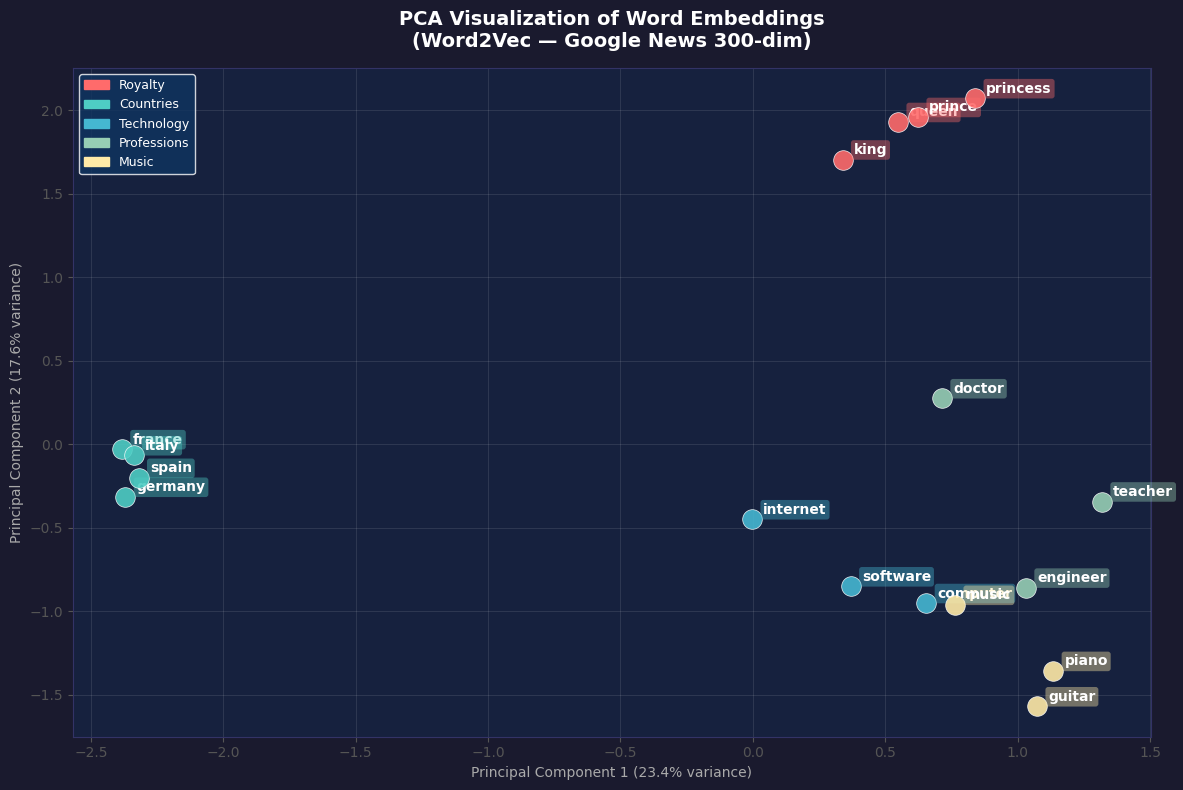


 PCA plot saved → pca_word2vec.png


In [9]:
section('PCA Visualization — Word2Vec', '')


word_groups = {
    'Royalty'     : ['king', 'queen', 'prince', 'princess'],
    'Countries'   : ['france', 'germany', 'italy', 'spain'],
    'Technology'  : ['computer', 'software', 'internet'],
    'Professions' : ['doctor', 'teacher', 'engineer'],
    'Music'       : ['music', 'guitar', 'piano'],
}

group_colors = {
    'Royalty'    : '#FF6B6B',
    'Countries'  : '#4ECDC4',
    'Technology' : '#45B7D1',
    'Professions': '#96CEB4',
    'Music'      : '#FFEAA7',
}


valid_words, vectors, colors, labels = [], [], [], []
for group, words in word_groups.items():
    for w in words:
        if w in w2v_model.key_to_index:
            valid_words.append(w)
            vectors.append(w2v_model[w])
            colors.append(group_colors[group])
            labels.append(group)

vectors_np = np.array(vectors)
print(f'Total words for PCA: {len(valid_words)}')


pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(vectors_np)
var_exp = pca.explained_variance_ratio_
print(f'Explained variance  : PC1={var_exp[0]*100:.1f}%  PC2={var_exp[1]*100:.1f}%')


fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#1a1a2e')
ax.set_facecolor('#16213e')

for i, (word, (x, y)) in enumerate(zip(valid_words, coords)):
    c = colors[i]
    ax.scatter(x, y, color=c, s=200, zorder=3, alpha=0.9,
               edgecolors='white', linewidths=0.5)
    ax.annotate(word, (x, y),
                fontsize=10, color='white', fontweight='bold',
                xytext=(8, 4), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.2', facecolor=c,
                          alpha=0.4, edgecolor='none'))


patches = [mpatches.Patch(color=v, label=k) for k, v in group_colors.items()]
ax.legend(handles=patches, loc='upper left', fontsize=9,
          facecolor='#0f3460', edgecolor='white', labelcolor='white')

ax.set_title('PCA Visualization of Word Embeddings\n(Word2Vec — Google News 300-dim)',
             fontsize=14, color='white', fontweight='bold', pad=15)
ax.set_xlabel(f'Principal Component 1 ({var_exp[0]*100:.1f}% variance)',
              color='#aaaaaa', fontsize=10)
ax.set_ylabel(f'Principal Component 2 ({var_exp[1]*100:.1f}% variance)',
              color='#aaaaaa', fontsize=10)
ax.tick_params(colors='#555555')
ax.grid(True, alpha=0.1, color='white')
ax.spines[:].set_color('#333366')

plt.tight_layout()
plt.savefig('pca_word2vec.png', dpi=150, bbox_inches='tight',
            facecolor=fig.get_facecolor())
plt.show()
print('\n PCA plot saved → pca_word2vec.png')

---
##  Cell 9 — PCA Visualization (GloVe, 2D)


    PCA Visualization — GloVe
Total words for PCA: 17
Explained variance  : PC1=26.4%  PC2=19.3%


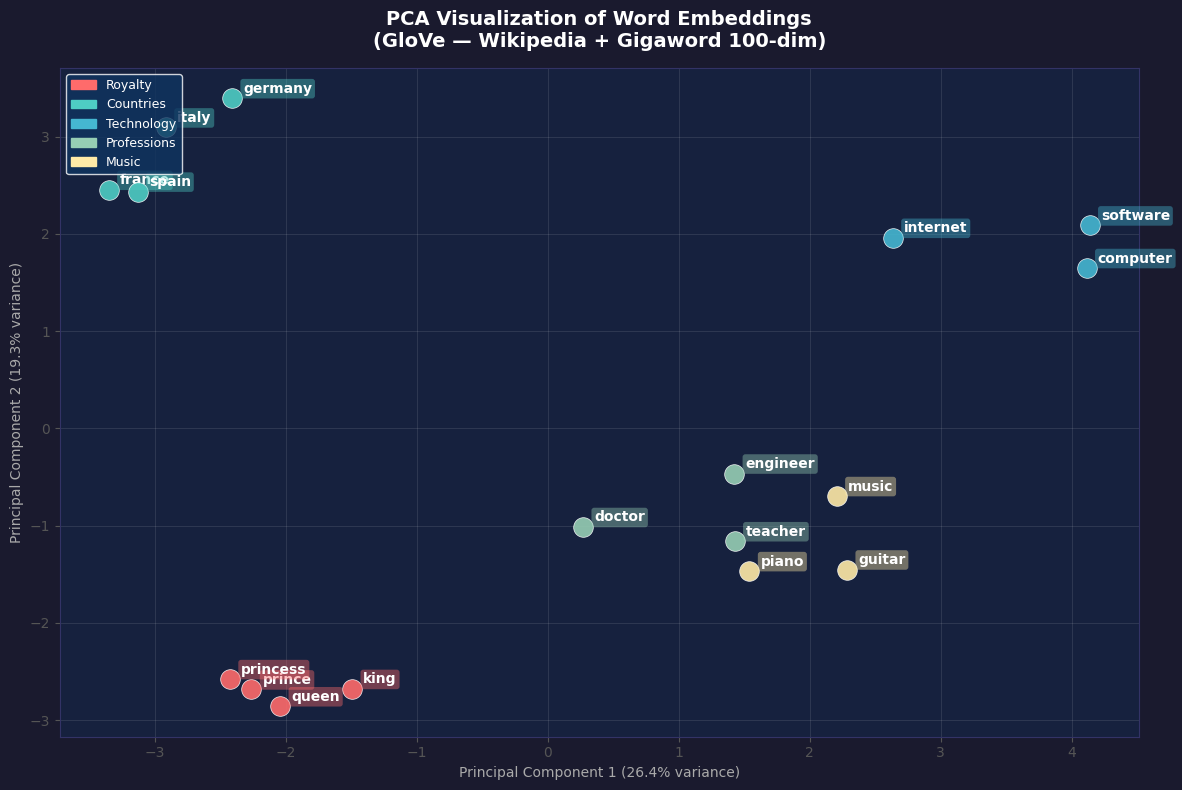


PCA plot saved → pca_glove.png


In [10]:
section('PCA Visualization — GloVe', '')

valid_words_g, vectors_g, colors_g = [], [], []
for group, words in word_groups.items():
    for w in words:
        if w in glove_model.key_to_index:
            valid_words_g.append(w)
            vectors_g.append(glove_model[w])
            colors_g.append(group_colors[group])

vectors_g_np = np.array(vectors_g)
print(f'Total words for PCA: {len(valid_words_g)}')

pca_g = PCA(n_components=2, random_state=42)
coords_g = pca_g.fit_transform(vectors_g_np)
var_exp_g = pca_g.explained_variance_ratio_
print(f'Explained variance  : PC1={var_exp_g[0]*100:.1f}%  PC2={var_exp_g[1]*100:.1f}%')

fig2, ax2 = plt.subplots(figsize=(12, 8))
fig2.patch.set_facecolor('#1a1a2e')
ax2.set_facecolor('#16213e')

for i, (word, (x, y)) in enumerate(zip(valid_words_g, coords_g)):
    c = colors_g[i]
    ax2.scatter(x, y, color=c, s=200, zorder=3, alpha=0.9,
                edgecolors='white', linewidths=0.5)
    ax2.annotate(word, (x, y),
                 fontsize=10, color='white', fontweight='bold',
                 xytext=(8, 4), textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.2', facecolor=c,
                           alpha=0.4, edgecolor='none'))

patches_g = [mpatches.Patch(color=v, label=k) for k, v in group_colors.items()]
ax2.legend(handles=patches_g, loc='upper left', fontsize=9,
           facecolor='#0f3460', edgecolor='white', labelcolor='white')

ax2.set_title('PCA Visualization of Word Embeddings\n(GloVe — Wikipedia + Gigaword 100-dim)',
              fontsize=14, color='white', fontweight='bold', pad=15)
ax2.set_xlabel(f'Principal Component 1 ({var_exp_g[0]*100:.1f}% variance)',
               color='#aaaaaa', fontsize=10)
ax2.set_ylabel(f'Principal Component 2 ({var_exp_g[1]*100:.1f}% variance)',
               color='#aaaaaa', fontsize=10)
ax2.tick_params(colors='#555555')
ax2.grid(True, alpha=0.1, color='white')
ax2.spines[:].set_color('#333366')

plt.tight_layout()
plt.savefig('pca_glove.png', dpi=150, bbox_inches='tight',
            facecolor=fig2.get_facecolor())
plt.show()
print('\nPCA plot saved → pca_glove.png')

---
##  Cell 10 — BONUS: Word2Vec vs GloVe Side-by-Side Similarity Comparison

In [ ]:
section('BONUS — Word2Vec vs GloVe Similarity Comparison', '')

compare_words = ['king', 'computer', 'music', 'france', 'doctor']
TOP_N = 5

print(f'  {"WORD":12s}  {"Word2Vec TOP-5":45s}  {"GloVe TOP-5"}')
print('  ' + '-'*100)

for word in compare_words:
    w2v_top  = []
    glv_top  = []

    if word in w2v_model.key_to_index:
        w2v_top = [f"{w}({round(s,2)})" for w, s in
                   w2v_model.most_similar(word, topn=TOP_N)]
    if word in glove_model.key_to_index:
        glv_top = [f"{w}({round(s,2)})" for w, s in
                   glove_model.most_similar(word, topn=TOP_N)]

    w2v_str = ', '.join(w2v_top) if w2v_top else 'N/A'
    glv_str = ', '.join(glv_top) if glv_top else 'N/A'
    print(f'  {word:12s}  {w2v_str:45s}  {glv_str}')


  ⭐  BONUS — Word2Vec vs GloVe Similarity Comparison
  WORD          Word2Vec TOP-5                                 GloVe TOP-5
  ----------------------------------------------------------------------------------------------------
  king          kings(0.71), queen(0.65), monarch(0.64), crown_prince(0.62), prince(0.62)  prince(0.77), queen(0.75), son(0.7), brother(0.7), monarch(0.7)
  computer      computers(0.8), laptop(0.66), laptop_computer(0.65), Computer(0.65), com_puter(0.61)  computers(0.88), software(0.84), technology(0.76), pc(0.74), hardware(0.73)
  music         classical_music(0.72), jazz(0.68), Music(0.66), Without_Donny_Kirshner(0.64), songs(0.64)  musical(0.81), songs(0.8), dance(0.79), pop(0.79), recording(0.77)
  france        spain(0.64), french(0.63), germany(0.63), europe(0.63), italy(0.63)  belgium(0.81), french(0.8), britain(0.8), spain(0.76), paris(0.75)
  doctor        physician(0.78), doctors(0.75), gynecologist(0.69), surgeon(0.68), dentist(0.68)  physician(0

---
##  Cell 11 — BONUS: Side-by-Side Bar Chart (Top-5 Similarity Scores)


    BONUS — Bar Chart Comparison


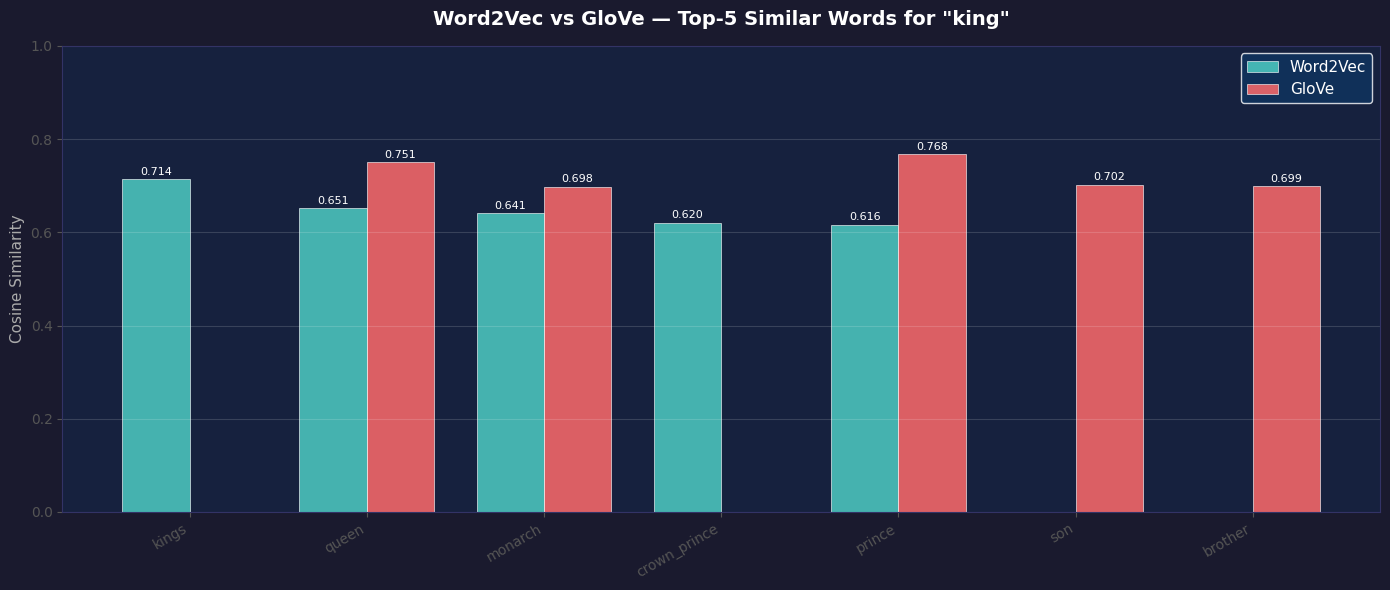


 Bar chart saved → comparison_bar_chart.png


In [12]:
section('BONUS — Bar Chart Comparison', '')

focus_word = 'king'
n_top = 5

w2v_sim = w2v_model.most_similar(focus_word, topn=n_top)
glv_sim = glove_model.most_similar(focus_word, topn=n_top)


w2v_dict = dict(w2v_sim)
glv_dict = dict(glv_sim)
all_words = list(dict.fromkeys(list(w2v_dict) + list(glv_dict)))  # preserve order

w2v_scores = [w2v_dict.get(w, 0) for w in all_words]
glv_scores = [glv_dict.get(w, 0) for w in all_words]

x = np.arange(len(all_words))
width = 0.38

fig3, ax3 = plt.subplots(figsize=(14, 6))
fig3.patch.set_facecolor('#1a1a2e')
ax3.set_facecolor('#16213e')

bars1 = ax3.bar(x - width/2, w2v_scores, width, label='Word2Vec',
                color='#4ECDC4', alpha=0.85, edgecolor='white', linewidth=0.5)
bars2 = ax3.bar(x + width/2, glv_scores,  width, label='GloVe',
                color='#FF6B6B', alpha=0.85, edgecolor='white', linewidth=0.5)


for bar in bars1:
    h = bar.get_height()
    if h > 0:
        ax3.text(bar.get_x() + bar.get_width()/2, h + 0.005,
                 f'{h:.3f}', ha='center', va='bottom',
                 color='white', fontsize=8)
for bar in bars2:
    h = bar.get_height()
    if h > 0:
        ax3.text(bar.get_x() + bar.get_width()/2, h + 0.005,
                 f'{h:.3f}', ha='center', va='bottom',
                 color='white', fontsize=8)

ax3.set_xticks(x)
ax3.set_xticklabels(all_words, rotation=30, ha='right', color='white', fontsize=10)
ax3.set_ylabel('Cosine Similarity', color='#aaaaaa', fontsize=11)
ax3.set_title(f'Word2Vec vs GloVe — Top-{n_top} Similar Words for "{focus_word}"',
              fontsize=14, color='white', fontweight='bold', pad=15)
ax3.legend(fontsize=11, facecolor='#0f3460', edgecolor='white', labelcolor='white')
ax3.tick_params(colors='#555555')
ax3.yaxis.label.set_color('#aaaaaa')
ax3.grid(True, axis='y', alpha=0.15, color='white')
ax3.spines[:].set_color('#333366')
ax3.set_ylim(0, 1.0)

plt.tight_layout()
plt.savefig('comparison_bar_chart.png', dpi=150, bbox_inches='tight',
            facecolor=fig3.get_facecolor())
plt.show()
print('\n Bar chart saved → comparison_bar_chart.png')

---
##  Cell 12 — BONUS: Side-by-Side PCA Comparison (Word2Vec vs GloVe)


  📊  BONUS — Side-by-Side PCA: Word2Vec vs GloVe


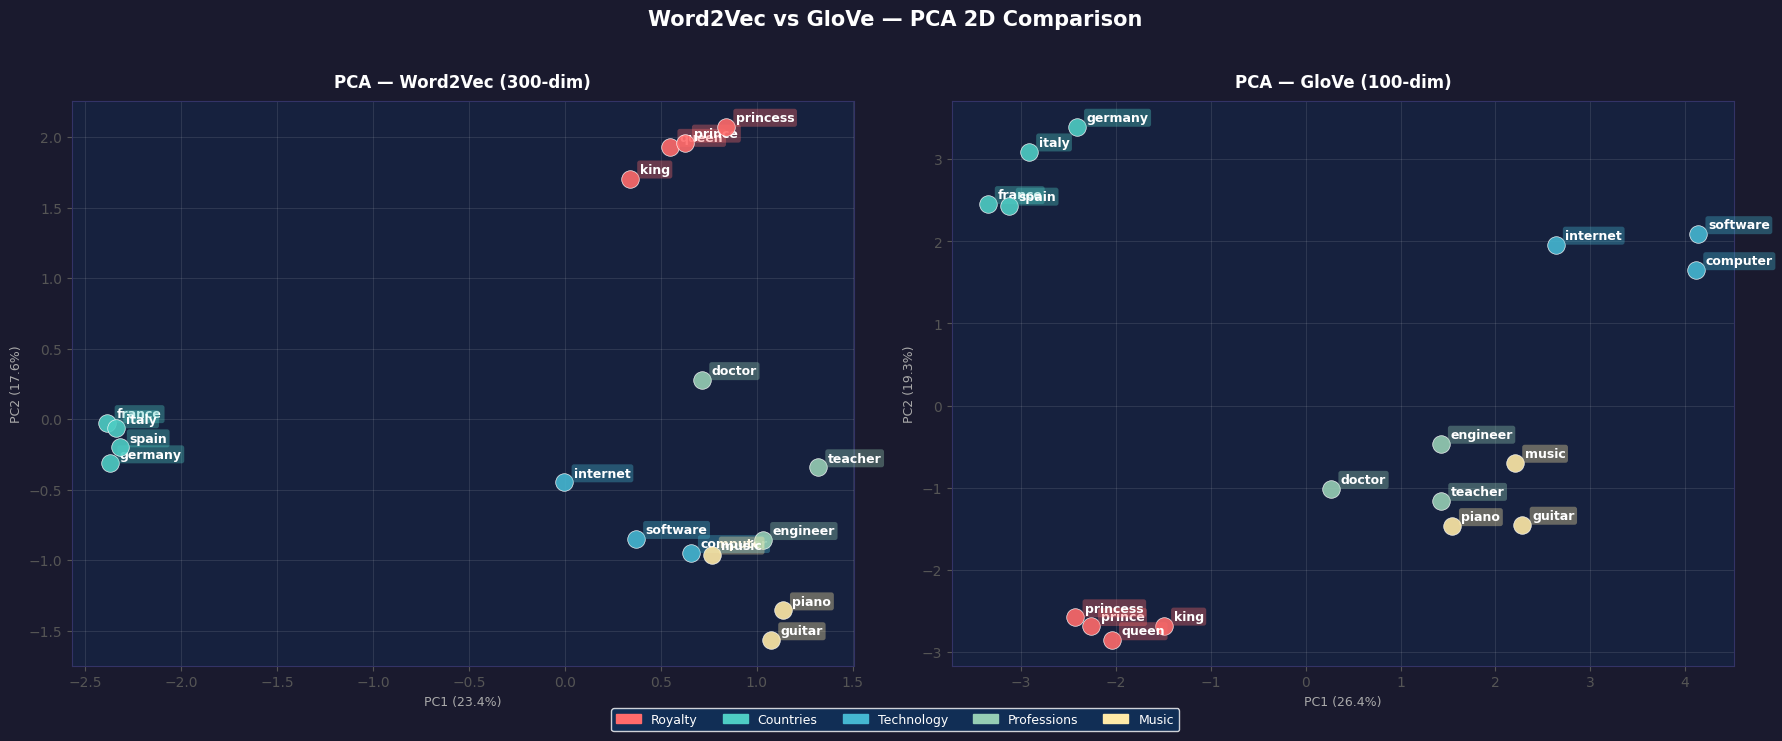


 Side-by-side PCA saved → pca_comparison_side_by_side.png


In [13]:
section('BONUS — Side-by-Side PCA: Word2Vec vs GloVe', '📊')


all_candidate = [w for grp in word_groups.values() for w in grp]
shared_words = [w for w in all_candidate
                if w in w2v_model.key_to_index and w in glove_model.key_to_index]
shared_colors = []
for w in shared_words:
    for grp, ws in word_groups.items():
        if w in ws:
            shared_colors.append(group_colors[grp])
            break

w2v_vecs = np.array([w2v_model[w] for w in shared_words])
glv_vecs = np.array([glove_model[w] for w in shared_words])

pca2 = PCA(n_components=2, random_state=42)
pca3 = PCA(n_components=2, random_state=42)
w2v_2d = pca2.fit_transform(w2v_vecs)
glv_2d = pca3.fit_transform(glv_vecs)

fig4, (ax4, ax5) = plt.subplots(1, 2, figsize=(18, 7))
fig4.patch.set_facecolor('#1a1a2e')

for axes, coords2d, title_model, pca_obj in [
    (ax4, w2v_2d, 'Word2Vec (300-dim)', pca2),
    (ax5, glv_2d, 'GloVe (100-dim)',    pca3),
]:
    axes.set_facecolor('#16213e')
    for i, (word, (x, y)) in enumerate(zip(shared_words, coords2d)):
        c = shared_colors[i]
        axes.scatter(x, y, color=c, s=160, zorder=3, alpha=0.9,
                     edgecolors='white', linewidths=0.5)
        axes.annotate(word, (x, y),
                      fontsize=9, color='white', fontweight='bold',
                      xytext=(7, 4), textcoords='offset points',
                      bbox=dict(boxstyle='round,pad=0.2', facecolor=c,
                                alpha=0.35, edgecolor='none'))
    ve = pca_obj.explained_variance_ratio_
    axes.set_title(f'PCA — {title_model}',
                   fontsize=12, color='white', fontweight='bold', pad=10)
    axes.set_xlabel(f'PC1 ({ve[0]*100:.1f}%)', color='#aaaaaa', fontsize=9)
    axes.set_ylabel(f'PC2 ({ve[1]*100:.1f}%)', color='#aaaaaa', fontsize=9)
    axes.tick_params(colors='#555555')
    axes.grid(True, alpha=0.1, color='white')
    axes.spines[:].set_color('#333366')

patches_s = [mpatches.Patch(color=v, label=k) for k, v in group_colors.items()]
fig4.legend(handles=patches_s, loc='lower center', ncol=5, fontsize=9,
            facecolor='#0f3460', edgecolor='white', labelcolor='white',
            bbox_to_anchor=(0.5, -0.02))
fig4.suptitle('Word2Vec vs GloVe — PCA 2D Comparison', fontsize=15,
               color='white', fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('pca_comparison_side_by_side.png', dpi=150, bbox_inches='tight',
            facecolor=fig4.get_facecolor())
plt.show()
print('\n Side-by-side PCA saved → pca_comparison_side_by_side.png')